In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# viewing data folder

! ls ../unzippedData

bom.movie_gross.csv  rt.movie_info.tsv    tmdb.movies.csv
im.db                rt.reviews.tsv       tn.movie_budgets.csv


In [3]:
# making connection to imdb

conn = sqlite3.connect('../unzippedData/im.db')

In [4]:
MovieBudget = pd.read_csv('../unzippedData/tn.movie_budgets.csv')
MovieBudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
# function for cleaning numbers column

def clean_number_series(Series):
    Series = Series.str.replace(",", "")
    Series = Series.str.replace("$", "")
    Series = Series.astype(int)
    return Series

# function for cleaning Column headers

def clean_column_headers(dataframe):
    dataframe.columns = dataframe.columns.str.title()
    dataframe.columns = dataframe.columns.str.replace("_", " ")
    
# function for cleaning comma seperated string values of a series into list of strings. Accepts one series.

def clean_comma_series(Series):
    Series = Series.str.replace("_", " ")
    Series = Series.str.title()
    Series = Series.str.split(",")
    return Series

In [6]:
# Reformatted Movie Budget

clean_column_headers(MovieBudget)
MovieBudget['Worldwide Gross'] = clean_number_series(MovieBudget['Worldwide Gross'])
MovieBudget['Domestic Gross'] = clean_number_series(MovieBudget['Domestic Gross'])
MovieBudget['Production Budget'] = clean_number_series(MovieBudget['Production Budget'])


In [7]:
# Making Profitability Column and Revenue Budget Ratio Column

MovieBudget['Profitability'] = MovieBudget['Worldwide Gross'] + MovieBudget['Domestic Gross'] - MovieBudget['Production Budget']
MovieBudget['ROI'] = (MovieBudget['Worldwide Gross'] + MovieBudget['Domestic Gross']) / MovieBudget['Production Budget']

MovieBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5782 non-null   int64  
 1   Release Date       5782 non-null   object 
 2   Movie              5782 non-null   object 
 3   Production Budget  5782 non-null   int64  
 4   Domestic Gross     5782 non-null   int64  
 5   Worldwide Gross    5782 non-null   int64  
 6   Profitability      5782 non-null   int64  
 7   ROI                5782 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 361.5+ KB


In [8]:
#Original: 
#filtered movies df by date and budget 

#MovieBudgetFiltered = MovieBudget[(MovieBudget['Production Budget'] < 40000000) & (MovieBudget['Production Budget'] > 0)]
#MovieBudgetFiltered = MovieBudget.copy()
#MovieBudgetFiltered.sort_values('RBR', ascending=False, inplace=True)
#MovieBudgetFiltered.reset_index(drop=True, inplace=True)
#MovieBudgetFiltered[:50]
#MovieBudgetFiltered['Release Date'] = MovieBudgetFiltered['Release Date'].str[-4:].astype(int)
#MovieBudgetFiltered= MovieBudgetFiltered[(MovieBudgetFiltered['Release Date']>1990)].reset_index(drop=True)
#MovieBudgetFiltered['Movie'] = MovieBudgetFiltered['Movie'].str.replace('â', "'")
#MovieBudgetFiltered

In [9]:
#NEW
# filtered movies df by date and budget 

MovieBudget_NoBounds = MovieBudget.copy()
# MovieBudgetFiltered =MovieBudget[(MovieBudget['Production Budget'] < 40000000) & (MovieBudget['Production Budget'] > 0)]
# MovieBudgetFiltered = MovieBudget.copy()
MovieBudget_NoBounds.sort_values('ROI', ascending=False, inplace=True)
MovieBudget_NoBounds.reset_index(drop=True, inplace=True)
#MovieBudgetFiltered[:50]
MovieBudget_NoBounds['Release Date'] = MovieBudget_NoBounds['Release Date'].str[-4:].astype(int)
MovieBudget_NoBounds = MovieBudget_NoBounds[(MovieBudget_NoBounds['Release Date']>1990)].reset_index(drop=True)
MovieBudget_NoBounds['Movie'] = MovieBudget_NoBounds['Movie'].str.replace('â', "'")
MovieBudget_NoBounds

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI
0,93,2009,Paranormal Activity,450000,107918810,194183034,301651844,671.337431
1,7,1999,The Blair Witch Project,600000,140539099,248300000,388239099,648.065165
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840
3,74,1993,El Mariachi,7000,2040920,2041928,4075848,583.264000
4,10,2004,Super Size Me,65000,11529368,22233808,33698176,519.433477
...,...,...,...,...,...,...,...,...
5175,13,2014,Once Upon a Time in Queens,1500000,0,0,-1500000,0.000000
5176,12,2011,The Lion of Judah,1500000,0,0,-1500000,0.000000
5177,11,2006,Fetching Cody,1500000,0,0,-1500000,0.000000
5178,38,2019,Living Dark: The Story of Ted the Caver,1750000,0,0,-1750000,0.000000


In [10]:
#NEW

##This .describe() provides our parameters for our 4 Production Budget ranges:

#Production Budget (Risk Level 1): $0 - 5,575,000
#Production Budget (Risk Level 2): $5,575,000 - 20,000,000
#Production Budget (Risk Level 3): $20,000,000 - 45,000,000
#Production Budget (Risk Level 4): $45,000,000+
MovieBudget_NoBounds['Production Budget'].describe()

count    5.180000e+03
mean     3.394279e+07
std      4.336466e+07
min      1.100000e+03
25%      5.575000e+06
50%      2.000000e+07
75%      4.500000e+07
max      4.250000e+08
Name: Production Budget, dtype: float64

In [11]:
# ORIGINAL: 
# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

,Movie,Genres
0,Sunghursh,"[Action, Crime, Drama]"
1,One Day Before the Rainy Season,"[Biography, Drama]"
2,The Other Side of the Wind,[Drama]
3,Sabse Bada Sukh,"[Comedy, Drama]"
4,The Wandering Soap Opera,"[Comedy, Drama, Fantasy]"
...,...,...
146139,Kuambil Lagi Hatiku,[Drama]
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,[Documentary]
146141,Dankyavar Danka,[Comedy]
146142,6 Gunn,None


In [12]:
# merged data sets
Merged_df = MovieBudget_NoBounds.merge(movie_genres_df, on = 'Movie', how='left')
Merged_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
0,93,2009,Paranormal Activity,450000,107918810,194183034,301651844,671.337431,NaN
1,7,1999,The Blair Witch Project,600000,140539099,248300000,388239099,648.065165,NaN
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,"[Horror, Mystery, Thriller]"
3,74,1993,El Mariachi,7000,2040920,2041928,4075848,583.264000,NaN
4,10,2004,Super Size Me,65000,11529368,22233808,33698176,519.433477,NaN
...,...,...,...,...,...,...,...,...,...
5175,13,2014,Once Upon a Time in Queens,1500000,0,0,-1500000,0.000000,"[Comedy, Drama]"
5176,12,2011,The Lion of Judah,1500000,0,0,-1500000,0.000000,[Animation]
5177,11,2006,Fetching Cody,1500000,0,0,-1500000,0.000000,NaN
5178,38,2019,Living Dark: The Story of Ted the Caver,1750000,0,0,-1750000,0.000000,[Horror]


In [13]:
# Explode Genres column to split any movies that are in multiple Genres
MergedExploded_df = Merged_df.explode('Genres')

# Drop any movies that have a null value in the Genres column, because we cannot run our
#     alysis without a Genre designation.
MergedExploded_df.dropna(subset=['Genres'], inplace=True)

MergedExploded_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Horror
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Mystery
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Thriller
14,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435,Horror
21,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412,Drama
...,...,...,...,...,...,...,...,...,...
5175,13,2014,Once Upon a Time in Queens,1500000,0,0,-1500000,0.000000,Drama
5176,12,2011,The Lion of Judah,1500000,0,0,-1500000,0.000000,Animation
5178,38,2019,Living Dark: The Story of Ted the Caver,1750000,0,0,-1750000,0.000000,Horror
5179,53,2019,Midway,59500000,0,0,-59500000,0.000000,Documentary


In [14]:
MergedExploded_df['Genres'].value_counts()

Drama          1123
Comedy          658
Action          545
Adventure       421
Thriller        382
Crime           304
Horror          269
Romance         262
Documentary     179
Biography       178
Sci-Fi          173
Mystery         167
Fantasy         150
Family          130
Animation       120
History          66
Music            65
Sport            49
War              30
Western          16
Musical          14
News              1
Name: Genres, dtype: int64

In [15]:
MergedExploded_df.groupby(by='Genres').mean()['ROI'].sort_values(ascending=False)

Genres
Mystery        12.039014
Horror         10.716437
Thriller        7.171265
Romance         5.429343
Music           5.233648
Animation       4.827915
Biography       4.773161
Comedy          4.685416
News            4.455096
Drama           4.443523
Sport           4.411250
Sci-Fi          4.365516
Fantasy         4.305842
Adventure       4.167884
Family          4.035236
Documentary     3.987435
Action          3.665188
History         3.384872
Crime           2.968521
War             2.565834
Musical         2.497530
Western         2.244972
Name: ROI, dtype: float64

In [16]:
MergedExploded_df.groupby(by='Genres').mean()['Profitability'].sort_values(ascending=False)

Genres
Animation      3.532625e+08
Adventure      3.259958e+08
Sci-Fi         2.931668e+08
Action         2.146116e+08
Fantasy        2.040319e+08
Family         1.546907e+08
Comedy         1.259140e+08
Musical        9.460728e+07
Thriller       9.379163e+07
Music          8.356144e+07
Mystery        8.269331e+07
Biography      7.911576e+07
Sport          7.588817e+07
Romance        7.464584e+07
Horror         7.257213e+07
Crime          7.070410e+07
Drama          6.911462e+07
History        6.737702e+07
Western        6.695423e+07
War            6.126825e+07
Documentary    5.613551e+07
News           4.146116e+07
Name: Profitability, dtype: float64

In [17]:
MergedExploded_df.groupby(by='Genres').mean()['Production Budget'].sort_values(ascending=False)

Genres
Adventure      9.527076e+07
Animation      8.827750e+07
Fantasy        7.677867e+07
Sci-Fi         7.630748e+07
Action         7.153312e+07
Family         5.513327e+07
Western        4.446875e+07
Comedy         3.515720e+07
Musical        3.385000e+07
Crime          2.890033e+07
Thriller       2.799803e+07
History        2.744621e+07
War            2.679333e+07
Drama          2.455449e+07
Biography      2.363670e+07
Mystery        2.355757e+07
Sport          2.292194e+07
Romance        2.101232e+07
Documentary    1.924534e+07
Horror         1.775207e+07
Music          1.617338e+07
News           1.200000e+07
Name: Production Budget, dtype: float64

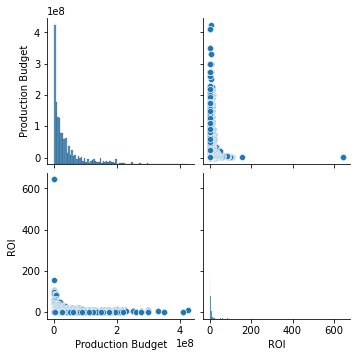

In [18]:
# ORIGINAL: 
sns.pairplot(MergedExploded_df, vars=[ 'Production Budget', 'ROI']);

In [19]:
# ORIGINAL: 
# ANOVA
res = smf.ols(formula="ROI ~ C(Genres)", data=MergedExploded_df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.654
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.31e-08
Time:                        18:23:39   Log-Likelihood:                -22616.
No. Observations:                5302   AIC:                         4.528e+04
Df Residuals:                    5280   BIC:                         4.542e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6652      0.740      4.956      0.000       2.215       5.115
C(Genres)[T.Adventure]       0.5027      1.120      0.449      0.654      -1.693       2.699
C(Genres)[T.Animation]       1.1627      1.741      0.668      0.504      -2.250       4.576
C(Genres)[T.Biography]       1.1080      1.490      0.743      0.457      -1.814       4.030
C(Genres)[T.Comedy]          1.0202      1.000      1.020      0.308      -0.940       2.980
C(Genres)[T.Crime]          -0.6967      1.236     -0.564      0.573      -3.119       1.726
C(Genres)[T.Documentary]     0.3222      1.487      0.217      0.828      -2.593       3.238
C(Genres)[T.Drama]           0.7783      0.901      0.864      0.388      -0.989       2.545
C(Genres)[T.Family]          0.3700      1.685      0.220      0.826      -2.933       3.674
C(Genres)[T.Fantasy]         0.6407      1.592      0.402      0.687      -2.480       3.761
C(Genres)[T.History]        -0.2803      2.250     -0.125      0.901      -4.691       4.131
C(Genres)[T.Horror]          7.0512      1.286      5.481      0.000       4.529       9.573
C(Genres)[T.Music]           1.5685      2.265      0.692      0.489      -2.873       6.010
C(Genres)[T.Musical]        -1.1677      4.673     -0.250      0.803     -10.329       7.993
C(Genres)[T.Mystery]         8.3738      1.527      5.484      0.000       5.380      11.367
C(Genres)[T.News]            0.7899     17.280      0.046      0.964     -33.086      34.666
C(Genres)[T.Romance]         1.7642      1.298      1.359      0.174      -0.780       4.309
C(Genres)[T.Sci-Fi]          0.7003      1.507      0.465      0.642      -2.253       3.654
C(Genres)[T.Sport]           0.7461      2.575      0.290      0.772      -4.302       5.794
C(Genres)[T.Thriller]        3.5061      1.152      3.043      0.002       1.248       5.764
C(Genres)[T.War]            -1.0994      3.238     -0.340      0.734      -7.446       5.248
C(Genres)[T.Western]        -1.4202      4.379     -0.324      0.746     -10.005       7.164
==============================================================================
Omnibus:                    13598.570   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        239390196.248
Skew:                          28.858   Prob(JB):                         0.00
Kurtosis:                    1042.371   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualizations Exploration

In [20]:
# Line graphs to show trends in profitability by genre over the last [x] years at a
## particular Production Budget.

#Production Budget (Risk Level 1): $0 - 5,000,000
#Production Budget (Risk Level 2): $5,000,000 - 17,000,000
#Production Budget (Risk Level 3): $17,000,000 - 40,000,000
#Production Budget (Risk Level 4): $40,000,000+

In [21]:
# ORIGINAL:
MovieBudgetFiltered = MovieBudget[(MovieBudget['Production Budget'] < 40000000) & (MovieBudget['Production Budget'] > 0)]
# MovieBudgetFiltered = MovieBudget.copy()
MovieBudgetFiltered.sort_values('ROI', ascending=False, inplace=True)
MovieBudgetFiltered.reset_index(drop=True, inplace=True)
MovieBudgetFiltered[:50]
MovieBudgetFiltered['Release Date'] = MovieBudgetFiltered['Release Date'].str[-4:].astype(int)
MovieBudgetFiltered= MovieBudgetFiltered[(MovieBudgetFiltered['Release Date']>1990)].reset_index(drop=True)
MovieBudgetFiltered['Movie'] = MovieBudgetFiltered['Movie'].str.replace('â', "'")
MovieBudgetFiltered

# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

# merged data sets

Merged_df = MovieBudgetFiltered.merge(movie_genres_df, on = 'Movie', how='left')
Merged_df


# Explode Datasets

MergedExploded_df = Merged_df.explode('Genres')
MergedExploded_df.dropna(subset=['Genres'], inplace=True)
# MergedExploded_df.dropna(subset='Genres', inplace=True)

MergedExploded_df

<ipython-input-21-4e5f07626dc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieBudgetFiltered.sort_values('ROI', ascending=False, inplace=True)
<ipython-input-21-4e5f07626dc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieBudgetFiltered['Release Date'] = MovieBudgetFiltered['Release Date'].str[-4:].astype(int)


,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Horror
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Mystery
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Thriller
14,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435,Horror
21,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412,Drama
...,...,...,...,...,...,...,...,...,...
3659,31,2012,Dysfunctional Friends,1800000,0,0,-1800000,0.000000,Drama
3660,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,Action
3660,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,Adventure
3660,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,Sci-Fi


In [22]:
MovieBudgetViz = MovieBudget.copy()

In [23]:
MovieBudgetViz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5782 non-null   int64  
 1   Release Date       5782 non-null   object 
 2   Movie              5782 non-null   object 
 3   Production Budget  5782 non-null   int64  
 4   Domestic Gross     5782 non-null   int64  
 5   Worldwide Gross    5782 non-null   int64  
 6   Profitability      5782 non-null   int64  
 7   ROI                5782 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 361.5+ KB


In [24]:
#Cleaning this section to remove EARLY filters
#high_bound = 5000000
#low_bound = 0

#MovieBudgetViz = MovieBudget[(MovieBudget['Production Budget'] < high_bound) & (MovieBudget['Production Budget'] > low_bound)]
#MovieBudgetViz.sort_values('Revenue Budget Ratio', ascending=False, inplace=True)
#MovieBudgetViz.reset_index(drop=True, inplace=True)
#MovieBudgetViz[:50]
#MovieBudgetViz['Release Date'] = MovieBudgetViz['Release Date'].str[-4:].astype(int)
#MovieBudgetViz = MovieBudgetViz[(MovieBudgetViz['Release Date']>2010)].reset_index(drop=True)
#MovieBudgetViz['Movie'] = MovieBudgetViz['Movie'].str.replace('â', "'")
#MovieBudgetViz.info()

In [25]:
#Creating variables for defining the budget sets.
high_bound_r1 = 5575000
low_bound_r1 = 0
MovieBudgetViz = MovieBudget.copy()

MovieBudgetViz = MovieBudgetViz[(MovieBudgetViz['Production Budget'] < high_bound_r1) & (MovieBudgetViz['Production Budget'] > low_bound_r1)]
MovieBudgetViz.sort_values('ROI', ascending=False, inplace=True)
MovieBudgetViz.reset_index(drop=True, inplace=True)
#MovieBudgetViz[:50]
MovieBudgetViz['Release Date'] = MovieBudgetViz['Release Date'].str[-4:].astype(int)
# Removing the date filter so we don't lose anymore data here.
MovieBudgetViz = MovieBudgetViz[(MovieBudgetViz['Release Date']>1990)].reset_index(drop=True)
MovieBudgetViz['Movie'] = MovieBudgetViz['Movie'].str.replace('â', "'")
MovieBudgetViz

# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

# merged data sets

MergedTest_df = MovieBudgetViz.merge(movie_genres_df, on = 'Movie', how='left')
MergedTest_df


# Explode Datasets

MergedExplodedTest_df = MergedTest_df.explode('Genres')
MergedExplodedTest_df.dropna(subset=['Genres'], inplace=True)
# MergedExplodedTest_df.dropna(subset='Genres', inplace=True)
                          
MergedExplodedTest_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Horror
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Mystery
2,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Thriller
14,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435,Horror
21,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412,Drama
...,...,...,...,...,...,...,...,...,...
1293,89,2014,The Sound and the Shadow,500000,0,0,-500000,0.000000,Mystery
1293,89,2014,The Sound and the Shadow,500000,0,0,-500000,0.000000,Thriller
1294,98,2015,The Curse of Downers Grove,2000000,0,0,-2000000,0.000000,Drama
1294,98,2015,The Curse of Downers Grove,2000000,0,0,-2000000,0.000000,Horror


In [26]:
MergedExplodedTest_df['Genres'].value_counts().describe()

count     21.000000
mean      61.476190
std       75.133627
min        3.000000
25%       14.000000
50%       35.000000
75%       78.000000
max      325.000000
Name: Genres, dtype: float64

In [27]:
r1_genresAboveMedianCount = list(MergedExplodedTest_df['Genres'].value_counts()[:10].index)
r1_genresFiltered = MergedExplodedTest_df.loc[MergedExplodedTest_df['Genres'].isin(r1_genresAboveMedianCount)]
r1_genresFiltered['Genres'].value_counts()

Drama          325
Comedy         158
Horror         133
Thriller       121
Documentary     79
Romance         78
Action          66
Mystery         61
Crime           58
Sci-Fi          43
Name: Genres, dtype: int64

In [28]:
r1_genresFiltered.groupby(by='Genres').mean()['ROI'].sort_values(ascending=False)

Genres
Mystery        24.494567
Horror         15.785211
Thriller       13.176936
Romance         7.175683
Drama           5.378519
Comedy          4.814089
Sci-Fi          3.618184
Documentary     3.175798
Action          2.802851
Crime           2.245208
Name: ROI, dtype: float64

## TOP AVERAGE ROI's  by Genre for 0 - 5,575,000 bin:
### Mystery: 24.495
- 61 films
### Horror: 15.785
- 133 films
### Thriller: 13.177
- 121 films

In [29]:
#Creating variables for defining the budget sets.
high_bound_r2 = 20000000
low_bound_r2 = 5575000
MovieBudgetViz_r2 = MovieBudget.copy()

MovieBudgetViz_r2 = MovieBudgetViz_r2[(MovieBudgetViz_r2['Production Budget'] < high_bound_r2) & (MovieBudgetViz_r2['Production Budget'] > low_bound_r2)]
MovieBudgetViz_r2.sort_values('ROI', ascending=False, inplace=True)
MovieBudgetViz_r2.reset_index(drop=True, inplace=True)
#MovieBudgetViz[:50]
MovieBudgetViz_r2['Release Date'] = MovieBudgetViz_r2['Release Date'].str[-4:].astype(int)
# Removing the date filter so we don't lose anymore data here.
MovieBudgetViz_r2 = MovieBudgetViz[(MovieBudgetViz_r2['Release Date']>1990)].reset_index(drop=True)
MovieBudgetViz_r2['Movie'] = MovieBudgetViz_r2['Movie'].str.replace('â', "'")
MovieBudgetViz_r2

# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

# merged data sets

Merged_r2_df = MovieBudgetViz_r2.merge(movie_genres_df, on = 'Movie', how='left')
Merged_r2_df


# Explode Datasets

MergedExploded_r2_df = Merged_r2_df.explode('Genres')
MergedExploded_r2_df.dropna(subset=['Genres'], inplace=True)
# MergedExplodedTest_df.dropna(subset='Genres', inplace=True)

MergedExploded_r2_df

<ipython-input-29-2c91c3779841>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MovieBudgetViz_r2 = MovieBudgetViz[(MovieBudgetViz_r2['Release Date']>1990)].reset_index(drop=True)


,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
10,63,2011,Insidious,1500000,54009150,99870886,152380036,102.586691,Horror
10,63,2011,Insidious,1500000,54009150,99870886,152380036,102.586691,Mystery
10,63,2011,Insidious,1500000,54009150,99870886,152380036,102.586691,Thriller
12,65,2010,Paranormal Activity 2,3000000,84752907,177512032,259264939,87.421646,Horror
13,49,2017,Get Out,5000000,176040665,255367951,426408616,86.281723,Horror
...,...,...,...,...,...,...,...,...,...
1085,89,2014,The Sound and the Shadow,500000,0,0,-500000,0.000000,Mystery
1085,89,2014,The Sound and the Shadow,500000,0,0,-500000,0.000000,Thriller
1086,98,2015,The Curse of Downers Grove,2000000,0,0,-2000000,0.000000,Drama
1086,98,2015,The Curse of Downers Grove,2000000,0,0,-2000000,0.000000,Horror


In [30]:
MergedExploded_r2_df.describe()

,Id,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI
count,1095.000000,1095.000000,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1095.000000
mean,51.568950,2012.438356,2.197548e+06,5.043425e+06,9.035735e+06,1.188161e+07,5.306836
std,28.579639,4.254000,1.706261e+06,1.589483e+07,2.845361e+07,4.347123e+07,12.713513
min,1.000000,1993.000000,1.400000e+03,0.000000e+00,0.000000e+00,-5.500000e+06,0.000000
25%,28.000000,2011.000000,7.500000e+05,0.000000e+00,0.000000e+00,-1.500000e+06,0.000000
50%,51.000000,2013.000000,1.987650e+06,6.750500e+04,2.814470e+05,-2.250030e+05,0.247771
75%,77.000000,2015.000000,3.500000e+06,2.419644e+06,4.644254e+06,4.600182e+06,3.786846
max,100.000000,2019.000000,5.500000e+06,1.760407e+08,2.789648e+08,4.264086e+08,102.586691


In [31]:
r2_genresAboveMedianCount = list(MergedExploded_r2_df['Genres'].value_counts()[:10].index)
r2_genresFiltered = MergedExploded_r2_df.loc[MergedExploded_r2_df['Genres'].isin(r2_genresAboveMedianCount)]
r2_genresFiltered['Genres'].value_counts()

Drama          274
Comedy         139
Horror         118
Thriller        99
Documentary     68
Romance         66
Action          53
Crime           52
Mystery         51
Sci-Fi          39
Name: Genres, dtype: int64

In [32]:
r2_genresFiltered.groupby(by='Genres').mean()['ROI'].sort_values(ascending=False)

Genres
Mystery        12.635939
Horror          8.733906
Romance         7.450215
Thriller        7.067484
Drama           4.397226
Comedy          4.290208
Documentary     3.395213
Sci-Fi          3.161577
Action          1.840296
Crime           1.805298
Name: ROI, dtype: float64

In [33]:
Horror_r2 = r2_genresFiltered.loc[r2_genresFiltered['Genres'] == 'Horror']
Mys_r2 = r2_genresFiltered.loc[r2_genresFiltered['Genres'] == 'Mystery']
Rom_r2 = r2_genresFiltered.loc[r2_genresFiltered['Genres'] == 'Romance']

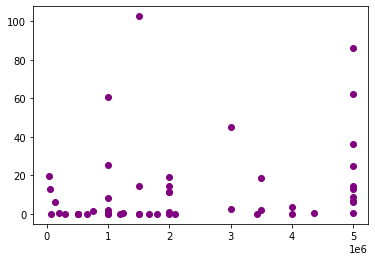

In [34]:
plt.scatter(Mys_r2['Production Budget'], Mys_r2['ROI'], color='purple')

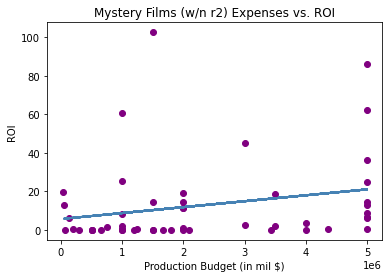

In [35]:
#define data
x = np.array(Mys_r2['Production Budget'])
y = np.array(Mys_r2['ROI'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

plt.xlabel('Production Budget (in mil $)')
plt.ylabel('ROI')
plt.title('Mystery Films (w/n r2) Expenses vs. ROI')


#add a line of best fit (REGRESSION LINE)
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2);

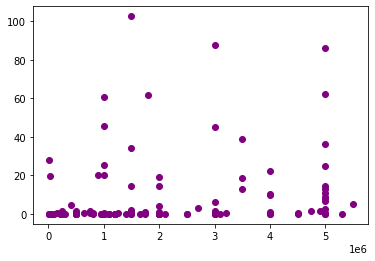

In [36]:
plt.scatter(Horror_r2['Production Budget'], Horror_r2['ROI'], color='purple')

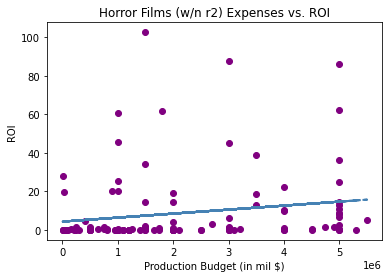

In [37]:
#define data
x = np.array(Horror_r2['Production Budget'])
y = np.array(Horror_r2['ROI'])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

plt.xlabel('Production Budget (in mil $)')
plt.ylabel('ROI')
plt.title('Horror Films (w/n r2) Expenses vs. ROI')


#add a line of best fit (REGRESSION LINE)
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2);



#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(0.5, 1.0, 'Mystery v. Horror v. Romance')

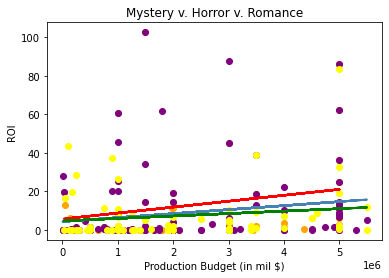

In [38]:
#Mystery:
mys_x = np.array(Mys_r2['Production Budget'])
mys_y = np.array(Mys_r2['ROI'])
mys_a, mys_b = np.polyfit(mys_x, mys_y, 1)
plt.scatter(mys_x, mys_y, color='orange')
plt.plot(mys_x, mys_a*mys_x+mys_b, color='red', linestyle='-', linewidth=2)

#Horror:
horror_x = np.array(Horror_r2['Production Budget'])
horror_y = np.array(Horror_r2['ROI'])
horror_a, horror_b = np.polyfit(horror_x, horror_y, 1)
plt.scatter(horror_x, horror_y, color='purple')
plt.plot(horror_x, horror_a*horror_x+horror_b, color='steelblue', linestyle='-', linewidth=2)

#Romance:
rom_x = np.array(Rom_r2['Production Budget'])
rom_y = np.array(Rom_r2['ROI'])
rom_a, rom_b = np.polyfit(rom_x, rom_y, 1)
plt.scatter(rom_x, rom_y, color='yellow')
plt.plot(rom_x, rom_a*rom_x + rom_b, color='green', linestyle='-', linewidth=2)

#Graph Clarity
plt.xlabel('Production Budget (in mil $)')
plt.ylabel('ROI')
plt.title('Mystery v. Horror v. Romance')


#add a line of best fit (REGRESSION LINE)
#plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2);



#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

## TOP 3 AVERAGE ROI's  by Genre for 5,575,000 - 20,000,000 bin:
### Mystery        12.635939
- 51 films
### Horror          8.733906
- 118 films
### Romance         7.450215
- 61 films

In [39]:
#Creating variables for defining the budget sets.
high_bound_r3 = 45000000
low_bound_r3 = 20000000
MovieBudgetViz_r3 = MovieBudget.copy()

MovieBudgetViz_r3 = MovieBudgetViz_r3[(MovieBudgetViz_r3['Production Budget'] < high_bound_r3) & (MovieBudgetViz_r3['Production Budget'] > low_bound_r3)]
MovieBudgetViz_r3.sort_values('ROI', ascending=False, inplace=True)
MovieBudgetViz_r3.reset_index(drop=True, inplace=True)
MovieBudgetViz_r3['Release Date'] = MovieBudgetViz_r3['Release Date'].str[-4:].astype(int)
MovieBudgetViz = MovieBudgetViz[(MovieBudgetViz['Release Date']>1990)].reset_index(drop=True)
MovieBudgetViz_r3['Movie'] = MovieBudgetViz_r3['Movie'].str.replace('â', "'")
MovieBudgetViz_r3

# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

# merged data sets

Merged_r3_df = MovieBudgetViz_r3.merge(movie_genres_df, on = 'Movie', how='left')
Merged_r3_df


# Explode Datasets

MergedExploded_r3_df = Merged_r3_df.explode('Genres')
MergedExploded_r3_df.dropna(inplace=True)
# MergedExplodedTest_df.dropna(subset='Genres', inplace=True)

MergedExploded_r3_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
2,5,1990,Ghost,22000000,217631306,517600000,713231306,33.419605,Drama
2,5,1990,Ghost,22000000,217631306,517600000,713231306,33.419605,Fantasy
2,5,1990,Ghost,22000000,217631306,517600000,713231306,33.419605,Mystery
3,24,2017,It,35000000,327481748,697457969,989939717,29.283992,Horror
3,24,2017,It,35000000,327481748,697457969,989939717,29.283992,Thriller
...,...,...,...,...,...,...,...,...,...
1154,29,2014,The Adventurer: The Curse of the Midas Box,25000000,0,0,-25000000,0.000000,Adventure
1154,29,2014,The Adventurer: The Curse of the Midas Box,25000000,0,0,-25000000,0.000000,Family
1154,29,2014,The Adventurer: The Curse of the Midas Box,25000000,0,0,-25000000,0.000000,Fantasy
1157,30,2019,Unhinged,29000000,0,0,-29000000,0.000000,Thriller


In [40]:
MergedExploded_r3_df.describe()

,Id,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI
count,1102.000000,1102.000000,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1102.000000
mean,51.833938,2011.529946,3.144102e+07,4.068159e+07,7.938983e+07,8.863040e+07,3.842158
std,28.188425,6.584773,6.195411e+06,4.306269e+07,8.691319e+07,1.254605e+08,4.105688
min,1.000000,1976.000000,2.050000e+07,0.000000e+00,0.000000e+00,-4.000000e+07,0.000000
25%,29.000000,2010.000000,2.500000e+07,1.309086e+07,2.535983e+07,8.483472e+06,1.268851
50%,52.000000,2013.000000,3.000000e+07,2.980726e+07,5.609620e+07,5.973720e+07,2.822133
75%,77.000000,2016.000000,3.600000e+07,5.261444e+07,9.823084e+07,1.193401e+08,4.923073
max,100.000000,2019.000000,4.450000e+07,3.274817e+08,6.974580e+08,9.899397e+08,33.419605


In [41]:
MergedExploded_r3_df['Genres'].value_counts()

Drama          251
Comedy         150
Action         126
Crime           91
Thriller        78
Romance         67
Adventure       59
Biography       49
Horror          38
Mystery         31
Documentary     30
Sci-Fi          24
Family          21
Fantasy         19
History         16
Music           15
Animation       14
Sport           12
War              8
Western          3
Name: Genres, dtype: int64

In [42]:
r3_genresAboveMedianCount = list(MergedExploded_r3_df['Genres'].value_counts()[:10].index)
r3_genresFiltered = MergedExploded_r3_df.loc[MergedExploded_r3_df['Genres'].isin(r3_genresAboveMedianCount)]
r3_genresFiltered['Genres'].value_counts()

Drama        251
Comedy       150
Action       126
Crime         91
Thriller      78
Romance       67
Adventure     59
Biography     49
Horror        38
Mystery       31
Name: Genres, dtype: int64

In [43]:
r3_genresFiltered.groupby(by='Genres').mean()['ROI'].sort_values(ascending=False)

Genres
Comedy       4.470033
Mystery      4.405577
Horror       4.182166
Romance      4.003302
Biography    3.731266
Drama        3.684490
Thriller     3.602456
Adventure    3.435025
Crime        3.422761
Action       3.348586
Name: ROI, dtype: float64

# TOP 3 AVERAGE RBR's  by Genre for 20,000,000 - 45,000,000:
### Comedy       4.470033
- 150 films
### Mystery      4.405577
- 31 films
### Horror       4.182166
- 38 films

In [44]:
#Creating variables for defining the budget sets.
low_bound_r4 = 45000000
MovieBudgetViz_r4 = MovieBudget.copy()

MovieBudgetViz_r4 = MovieBudgetViz_r4[MovieBudgetViz_r4['Production Budget'] > low_bound_r4]
MovieBudgetViz_r4.sort_values('ROI', ascending=False, inplace=True)
MovieBudgetViz_r4.reset_index(drop=True, inplace=True)
#MovieBudgetViz[:50]
MovieBudgetViz_r4['Release Date'] = MovieBudgetViz_r4['Release Date'].str[-4:].astype(int)
# Removing the date filter so we don't lose anymore data here.
MovieBudgetViz = MovieBudgetViz[(MovieBudgetViz['Release Date']>1990)].reset_index(drop=True)
MovieBudgetViz_r4['Movie'] = MovieBudgetViz_r4['Movie'].str.replace('â', "'")
MovieBudgetViz_r4

# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

# merged data sets

Merged_r4_df = MovieBudgetViz_r4.merge(movie_genres_df, on = 'Movie', how='left')
Merged_r4_df


# Explode Datasets

MergedExploded_r4_df = Merged_r4_df.explode('Genres')
MergedExploded_r4_df.dropna(subset=['Genres'], inplace=True)
# MergedExplodedTest_df.dropna(subset='Genres', inplace=True)

MergedExploded_r4_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI,Genres
1,73,2015,Minions,74000000,336045770,1160336173,1422381943,20.221378,Adventure
1,73,2015,Minions,74000000,336045770,1160336173,1422381943,20.221378,Animation
1,73,2015,Minions,74000000,336045770,1160336173,1422381943,20.221378,Comedy
2,84,2018,Bohemian Rhapsody,55000000,216303339,894985342,1056288681,20.205249,Biography
2,84,2018,Bohemian Rhapsody,55000000,216303339,894985342,1056288681,20.205249,Drama
...,...,...,...,...,...,...,...,...,...
1248,80,2017,Bright,90000000,0,0,-90000000,0.000000,Crime
1248,80,2017,Bright,90000000,0,0,-90000000,0.000000,Fantasy
1249,9,2019,Ad Astra,49800000,0,0,-49800000,0.000000,Adventure
1249,9,2019,Ad Astra,49800000,0,0,-49800000,0.000000,Drama


In [45]:
MergedExploded_r4_df.describe()

,Id,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profitability,ROI
count,1490.000000,1490.000000,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1490.000000
mean,49.254362,2012.268456,1.088917e+08,1.232471e+08,3.388602e+08,3.532156e+08,4.129450
std,29.107482,5.558204,5.837136e+07,1.157393e+08,3.222854e+08,3.979965e+08,3.166363
min,1.000000,1990.000000,4.600000e+07,0.000000e+00,0.000000e+00,-1.574753e+08,0.000000
25%,24.000000,2011.000000,6.000000e+07,4.515710e+07,1.134171e+08,8.083678e+07,1.977332
50%,47.000000,2013.000000,9.000000e+07,8.546331e+07,2.382027e+08,2.259203e+08,3.473737
75%,74.000000,2016.000000,1.450000e+08,1.626523e+08,4.573275e+08,4.969745e+08,5.412217
max,100.000000,2020.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09,20.221378


In [46]:
r4_genresAboveMedianCount = list(MergedExploded_r4_df['Genres'].value_counts()[:10].index)
r4_genresFiltered = MergedExploded_r4_df.loc[MergedExploded_r4_df['Genres'].isin(r4_genresAboveMedianCount)]
r4_genresFiltered['Genres'].value_counts()

Adventure    283
Action       276
Drama        165
Comedy       165
Animation     88
Fantasy       83
Sci-Fi        79
Thriller      75
Crime         59
Family        52
Name: Genres, dtype: int64

In [47]:
r4_genresFiltered.groupby(by='Genres').mean()['ROI'].sort_values(ascending=False)

Genres
Animation    5.405983
Sci-Fi       4.906038
Comedy       4.712159
Adventure    4.501283
Action       3.917541
Thriller     3.778881
Drama        3.590092
Family       3.541403
Fantasy      3.440387
Crime        3.165844
Name: ROI, dtype: float64

# TOP 3 AVERAGE RBR's  by Genre for 45,000,000+ bin:

### Animation    5.405983
- 88 films
### Sci-Fi       4.906038
- 79 films
### Comedy       4.712159
- 165